<a href="https://colab.research.google.com/github/jgracie52/CAP4630/blob/master/HW2_Problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup the CIFAR10 Dataset

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

##Preprocess the data

In [0]:
train_images = train_images.reshape((50000, 32, 32, 3)) /255.0
test_images = test_images.reshape((10000, 32, 32, 3)) /255.0

##Set up the Models

####Under fitted model

In [25]:
# set up the layers

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='elu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    #
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                230432    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 231,658
Trainable params: 231,658
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [27]:
# train the model
epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 104us/sample - loss: 2.9526 - acc: 0.0987 - val_loss: 2.3029 - val_acc: 0.1001
Epoch 2/10
50000/50000 [==============================] - 5s 101us/sample - loss: 2.3031 - acc: 0.0987 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 3/10
50000/50000 [==============================] - 5s 100us/sample - loss: 2.3027 - acc: 0.0973 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 4/10
50000/50000 [==============================] - 5s 101us/sample - loss: 2.3028 - acc: 0.0967 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 5/10
50000/50000 [==============================] - 5s 99us/sample - loss: 2.3027 - acc: 0.0966 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/10
50000/50000 [==============================] - 5s 100us/sample - loss: 2.3028 - acc: 0.0999 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/10
50000/50000 [==============================] - 5s 101us/sample - loss: 2.3028 - acc: 0.0975 - val_lo

#####Display the loss

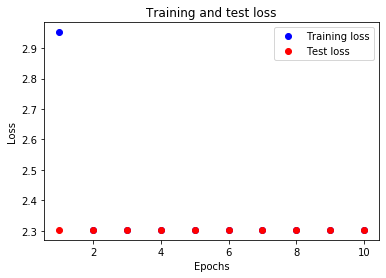

In [28]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#####Display the accuracy

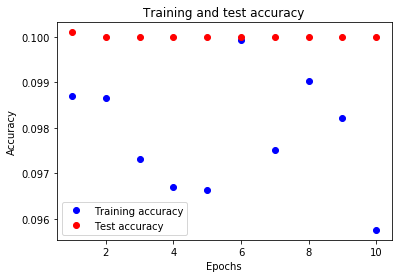

In [30]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Over fitted model

In [10]:
# set up the layers

model = keras.Sequential([
    keras.layers.Conv2D(32, (5, 5), activation='elu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    #
    keras.layers.Conv2D(64, (3, 3), activation='elu'),
    keras.layers.MaxPooling2D((2, 2)),
    #
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    #
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [0]:
# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 6s 120us/sample - loss: 1.7567 - acc: 0.3879 - val_loss: 1.3640 - val_acc: 0.4980
Epoch 2/20
50000/50000 [==============================] - 6s 116us/sample - loss: 1.3438 - acc: 0.5156 - val_loss: 1.3827 - val_acc: 0.5065
Epoch 3/20
50000/50000 [==============================] - 6s 117us/sample - loss: 1.2064 - acc: 0.5691 - val_loss: 1.1789 - val_acc: 0.5806
Epoch 4/20
50000/50000 [==============================] - 6s 117us/sample - loss: 1.1239 - acc: 0.6002 - val_loss: 1.2150 - val_acc: 0.5745
Epoch 5/20
50000/50000 [==============================] - 6s 117us/sample - loss: 1.0420 - acc: 0.6338 - val_loss: 1.1651 - val_acc: 0.5932
Epoch 6/20
50000/50000 [==============================] - 6s 115us/sample - loss: 0.9752 - acc: 0.6564 - val_loss: 1.0837 - val_acc: 0.6279
Epoch 7/20
50000/50000 [==============================] - 6s 116us/sample - loss: 0.9141 - acc: 0.6761 - val_l

#####Display the loss

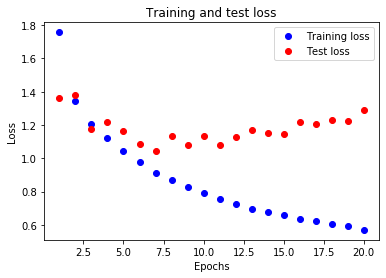

In [13]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

####Display the accuracy

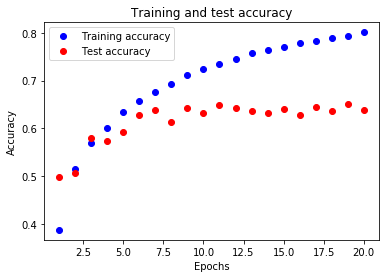

In [14]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

####Well fitted model

In [20]:
# set up the layers

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    #
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    #
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    #
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 64)       

In [0]:
# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [22]:
# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 11s 218us/sample - loss: 1.6220 - acc: 0.4152 - val_loss: 1.2921 - val_acc: 0.5338
Epoch 2/20
50000/50000 [==============================] - 10s 208us/sample - loss: 1.2263 - acc: 0.5650 - val_loss: 1.2023 - val_acc: 0.5742
Epoch 3/20
50000/50000 [==============================] - 10s 209us/sample - loss: 1.0792 - acc: 0.6192 - val_loss: 1.1165 - val_acc: 0.6173
Epoch 4/20
50000/50000 [==============================] - 10s 204us/sample - loss: 0.9822 - acc: 0.6547 - val_loss: 0.9148 - val_acc: 0.6788
Epoch 5/20
50000/50000 [==============================] - 10s 205us/sample - loss: 0.9179 - acc: 0.6771 - val_loss: 0.8911 - val_acc: 0.6826
Epoch 6/20
50000/50000 [==============================] - 10s 206us/sample - loss: 0.8581 - acc: 0.7005 - val_loss: 0.8105 - val_acc: 0.7207
Epoch 7/20
50000/50000 [==============================] - 10s 204us/sample - loss: 0.8233 - acc: 0.7122 

#####Display the loss

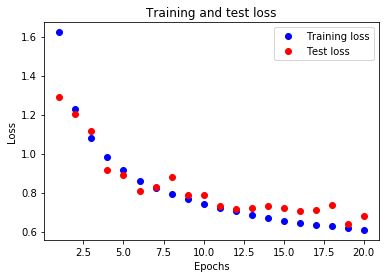

In [23]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#####Display the accuracy

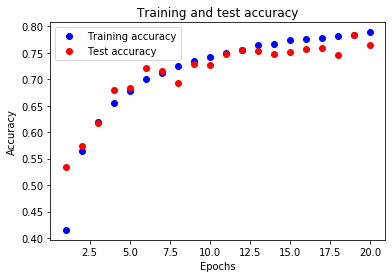

In [24]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()